# Econometria de Séries Temporais

## Diagnóstico de modelos

João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Como avaliar a estimação de um ARMA(p,q)?

## Pesquisa Industrial Mensal de Produção Física (PIM-PF)

Acesse [https://www.bcb.gov.br/](https://www.bcb.gov.br/) > Estatísticas > Séries Temporais (SGS) > Atividade econômica > Setor Real > Indústria > Indicadores de produção industrial (2012 = 100) e encontre o código para os dados dessazonalizados da produção geral.

Faça um gráfico da série:

Faça um gráfico para a primeira diferença do log da produção física da indústria geral:

Estime um um ARMA(1,1) para a primeira diferença do log da produção física da indústria geral:

Estime um um ARMA(2,2) para a primeira diferença do log da produção física da indústria geral:

Qual modelo você escolheria? Justifique.

De acordo com os três critérios de informação (AIC, AICc e BIC), o melhor modelo entre as duas especificações estimadas é o ARMA(2,2)

Faça um gráfico com os dados (da primeira diferença do log da produção física da indústria geral) e o valor previsto pelo modelo escolhido:

# Diagnóstico

Extraia os resíduos:

In [ ]:
resids <- residuals( arma22 )

In [ ]:
resids = arma22 %>% augment()

Veja os primeiros três elementos do objeto 'resids':

In [ ]:
head( resids, 3 )

Extraia os resíduos do modelo:

In [ ]:
resid = resids$.resid

Faça um gráfico dos resíduos:

Calcule a média dos resíduos:

# Testes de autocorrelação

Qual é a hipótese sobre a autocorrelação dos erros e o que isso implicada para as estatísticas sobre os resíduos?

R:

Estime a FAC dos resíduos (utilize o comando 'lag.min = 1')

In [ ]:
j = length( resid ) / 4  # Enders (2009)

In [ ]:
stats::acf( resid, main = "Resíduos", col = "darkred", ci.col = "black", lag.max = j, lag.min = 1 )

A primeira barra fora do intervalo de confiança é um problema? Justifique.

R:

Há uma forma alternativa de obter a FAC com o pacote 'fpp3':

In [ ]:
dlnind %>% as_tsibble() %>% model( ARIMA( dlnind ~ pdq(2,0,2) + PDQ(0,0,0) ) ) %>% augment() %>% select( .resid ) %>%
  ACF(.resid) %>%
  autoplot() +
  theme_wsj(color='gray') +
  scale_colour_wsj('colors6', '') +
  labs(title = "Autocorrelação dos resíduos", caption = "ARMA(2,2)") +
  theme(plot.title = element_text(size = 22))

## Teste Ljung-Box

$\mathcal{H}_0: \text{As primeiras k autocorrelações são iguais à zero}$ \\
$\mathcal{H}_a: \text{Ao menos uma das primeiras k autocorrelações é diferente de zero}$ \\

In [ ]:
library(stats)

In [ ]:
Box.test( resid,
          lag = 1,
          type = c( "Ljung-Box" ),
          fitdf = 0  # número de graus de liberdade
          )

Qual é a conclusão do teste?

R:

E para as demais defasagens?

**Desafio**: (a) crie um objeto com comprimento igual à 12, (b) depois faça um "loop" (usando o 'for' para calcular os valores-p para os lags de 1 a 12 e armazene-os nos elementos do objeto criado no item (a); finalmente, faça um gráfico que contenha os valores-p como função dos lags; (c) pode adicionar uma linha com o nível de significância do teste também (que será constante e se repete para cada lag).

## Teste Breusch-Godfrey (LM)

Qual é a conclusão do teste?

R:

# Testes de normalidade

Faça um histograma dos resíduos

Compare as observações da amostra com a distribuição teórica esperada de uma Normal:

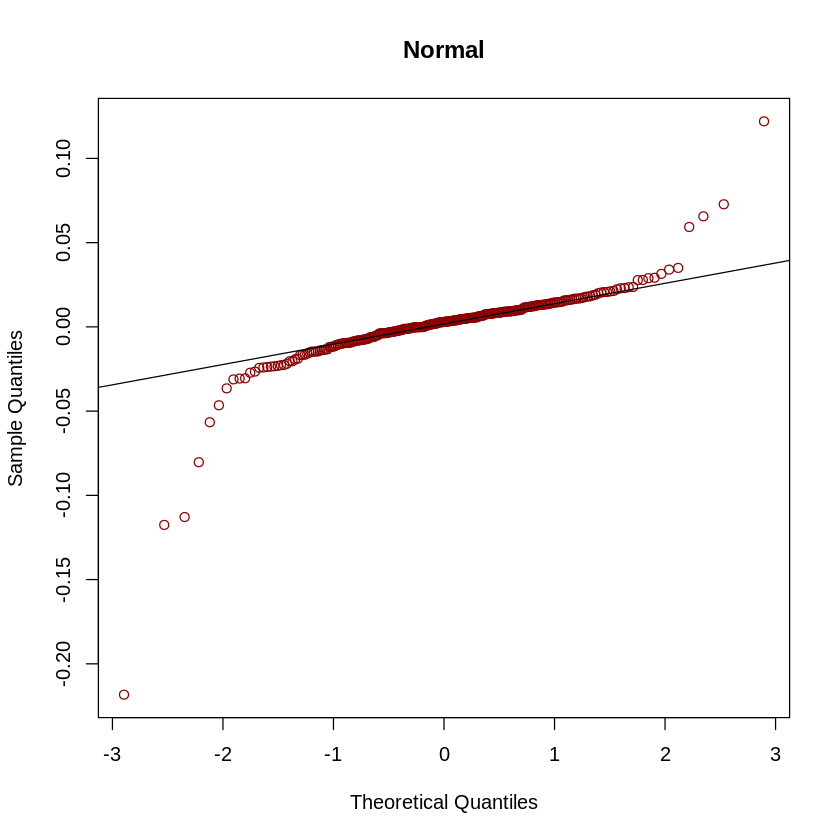

In [ ]:
qqnorm( resid, main='Normal', col = "darkred" )
qqline( resid )

### Teste Jarque-Bera

$\mathcal{H}_0: E[ \epsilon_t ]^3 = 0 \text{ e } E[ \epsilon_t ]^4 = 0$ \\
$\mathcal{H}_a: E[ \epsilon_t ]^3 \neq 0 \text{ } \text{ e/ou } \text{ } E[ \epsilon_t ]^4 \neq 0$ \\

In [ ]:
install.packages("tseries", quiet = TRUE)

In [ ]:
tseries::jarque.bera.test( resid )

Qual é o resultado do teste?

R:

### Teste Shapiro Wilk

$\mathcal{H}_0: \epsilon_t \sim N(0, \sigma^2)$ \\
$\mathcal{H}_a: \epsilon_t \text{ não segue } N(0, \sigma^2)$ \\

In [ ]:
stats::shapiro.test( resid )

Qual é o resultado do teste?

R:

# Teste de heterocedasticidade condicional

## Teste ARCH-LM

In [ ]:
install.packages("FinTS")

In [ ]:
FinTS::ArchTest( resid, lags=12, demean=FALSE)

Qual é o resultado do teste?

R:

# Teste de erro de especificação

## Teste RESET

In [ ]:
lmtest::resettest(resid ~ 0,
                  power=2:3,     # termos quadráticos e cúbicos
                  type="fitted")

Qual é o resultado do teste?

R: